In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_excel('NBA_Stats.xlsx')

In [4]:
data.head(5)

,Year,SeasonType,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30


DATA CLEANING AND ANALYSIS PREPARATIOIN

In [5]:
data.drop(columns=['RANK', 'EFF'], inplace=True)

In [6]:
data['season_start_year'] = data['Year'].str[:4].astype(int)

In [7]:
data.TEAM.unique()

array(['OKC', 'LAL', 'MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'CLE', 'NOH', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS', 'NOP'], dtype=object)

In [8]:
#Gop 2 doi NOH va NOP thanh 1 doi NOP (vi NOH da doi ten thanh NOP)
data['TEAM']=data['TEAM'].replace(to_replace=['NOH', 'NOP'], value='NOP')

In [9]:
#Lam sach ten season type
data['SeasonType'] = data['SeasonType'].replace('Regular%20Season', 'Regular Season')

In [10]:
#Tao dataframe moi chua du lieu cua mua giai Regular Season
data_regular_season = data[data['SeasonType'] == 'Regular Season']

In [11]:
#Tao dataframe moi chua du lieu cua mua giai Playoff
data_playoff = data[data['SeasonType'] == 'Playoffs']

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835 entries, 0 to 8834
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               8835 non-null   object 
 1   SeasonType         8835 non-null   object 
 2   PLAYER_ID          8835 non-null   int64  
 3   PLAYER             8835 non-null   object 
 4   TEAM_ID            8835 non-null   int64  
 5   TEAM               8835 non-null   object 
 6   GP                 8835 non-null   int64  
 7   MIN                8835 non-null   int64  
 8   FGM                8835 non-null   int64  
 9   FGA                8835 non-null   int64  
 10  FG_PCT             8835 non-null   float64
 11  FG3M               8835 non-null   int64  
 12  FG3A               8835 non-null   int64  
 13  FG3_PCT            8835 non-null   float64
 14  FTM                8835 non-null   int64  
 15  FTA                8835 non-null   int64  
 16  FT_PCT             8835 

In [12]:
data.columns

Index(['Year', 'SeasonType', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'AST_TOV', 'STL_TOV', 'season_start_year'],
      dtype='object')

In [13]:
total_columns = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FTM', 'FTA',
                 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS']

WHICH PLAYER STATS ARE CORRELATED WITH EACH OTHER

In [14]:
data_per_min = data.groupby(['PLAYER', 'PLAYER_ID', 'Year'])[total_columns].sum().reset_index()

for col in data_per_min.columns[4:]:
    data_per_min[col] = data_per_min[col] / data_per_min['MIN']

data_per_min['FG%'] = data_per_min['FGM'] / data_per_min['FGA']
data_per_min['3P%'] = data_per_min['FG3M'] / data_per_min['FG3A']
data_per_min['FT%'] = data_per_min['FTM'] / data_per_min['FTA']
data_per_min['FG3A%'] = data_per_min['FG3A'] / data_per_min['FGA']
data_per_min['PTS/FGA'] = data_per_min['PTS'] / data_per_min['FGA']
data_per_min['FG3M/FGA'] = data_per_min['FG3M'] / data_per_min['FGA']
data_per_min['FG3M/FGM'] = data_per_min['FG3M'] / data_per_min['FGM']
data_per_min['FTA/FGA'] = data_per_min['FTA'] / data_per_min['FGA']
data_per_min['TRU%'] = 0.5*data_per_min['PTS'] / (data_per_min['FGA'] + 0.475*data_per_min['FTA'])
data_per_min['AST/TOV'] = data_per_min['AST'] / data_per_min['TOV']
data_per_min = data_per_min[data_per_min['MIN'] > 50]

data_per_min

,PLAYER,PLAYER_ID,Year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,FG3A%,PTS/FGA,FG3M/FGA,FG3M/FGM,FTA/FGA,TRU%,AST/TOV
0,A.J. Lawson,1630639,2022-23,108,0.203704,0.407407,0.004630,0.092593,0.231481,0.018519,0.074074,0.055556,0.138889,0.194444,0.018519,0.018519,0.000000,0.027778,0.101852,0.518519,0.500000,0.400000,0.250000,0.568182,1.272727,0.227273,0.454545,0.181818,0.585774,0.666667
1,A.J. Lawson,1630639,2023-24,341,0.170088,0.381232,0.002610,0.043988,0.164223,0.046921,0.073314,0.043988,0.111437,0.155425,0.058651,0.029326,0.011730,0.041056,0.067449,0.431085,0.446154,0.267857,0.640000,0.430769,1.130769,0.115385,0.258621,0.192308,0.518062,1.428571
2,AJ Green,1631260,2022-23,345,0.153623,0.362319,0.001229,0.127536,0.304348,0.011594,0.011594,0.017391,0.113043,0.130435,0.063768,0.017391,0.000000,0.026087,0.089855,0.446377,0.424000,0.419048,1.000000,0.840000,1.232000,0.352000,0.830189,0.032000,0.606777,2.444444
3,AJ Green,1631260,2023-24,681,0.130690,0.311307,0.001172,0.104258,0.264317,0.029369,0.032305,0.013216,0.093979,0.107195,0.046990,0.013216,0.005874,0.019090,0.085169,0.395007,0.419811,0.394444,0.909091,0.849057,1.268868,0.334906,0.797753,0.103774,0.604630,2.461538
4,AJ Griffin,1631100,2022-23,1401,0.177016,0.380443,0.000332,0.072091,0.184868,0.029979,0.033547,0.026410,0.082798,0.109208,0.052106,0.029979,0.008565,0.029979,0.062099,0.456103,0.465291,0.389961,0.893617,0.485929,1.198874,0.189493,0.407258,0.088180,0.575339,1.738095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,Zion Williamson,1629627,2020-21,2026,0.312932,0.511846,0.000302,0.004936,0.016782,0.182132,0.261106,0.082428,0.135242,0.217670,0.111550,0.028134,0.019250,0.082428,0.066634,0.812932,0.611379,0.294118,0.697543,0.032787,1.588235,0.009643,0.015773,0.510125,0.639227,1.353293
6263,Zion Williamson,1629627,2022-23,956,0.298117,0.490586,0.000636,0.007322,0.019874,0.185146,0.259414,0.060669,0.150628,0.211297,0.139121,0.033473,0.016736,0.103556,0.067992,0.788703,0.607676,0.368421,0.713710,0.040512,1.607676,0.014925,0.024561,0.528785,0.642468,1.343434
6264,Zion Williamson,1629627,2023-24,2207,0.282737,0.495696,0.000258,0.002719,0.008156,0.157227,0.223833,0.055279,0.128681,0.183960,0.159493,0.034889,0.021296,0.087449,0.072043,0.725419,0.570384,0.333333,0.702429,0.016453,1.463437,0.005484,0.009615,0.451554,0.602491,1.823834
6265,Zoran Dragic,204054,2014-15,75,0.146667,0.400000,0.004893,0.040000,0.186667,0.040000,0.066667,0.066667,0.040000,0.106667,0.066667,0.026667,0.000000,0.066667,0.080000,0.373333,0.366667,0.214286,0.600000,0.466667,0.933333,0.100000,0.272727,0.166667,0.432432,1.000000


In [15]:
data_per_min_numeric = data_per_min.drop(columns='PLAYER_ID').select_dtypes(include=['float64', 'int64'])
data_per_min_corr = data_per_min_numeric.corr()

data_per_min_corr

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%,FG3A%,PTS/FGA,FG3M/FGA,FG3M/FGM,FTA/FGA,TRU%,AST/TOV
MIN,1.000000,0.439561,0.357195,-0.549387,0.183952,0.101616,0.348770,0.280468,-0.120624,0.045193,-0.021976,0.245371,0.042158,-0.053375,0.146695,-0.379986,0.465410,0.208027,0.171992,0.258103,-0.027696,0.274682,0.072787,0.000056,0.035405,0.332018,0.063964
FGM,0.439561,1.000000,0.871889,-0.162892,0.191301,0.139035,0.622429,0.582045,0.073434,0.232136,0.184712,0.236590,-0.028866,0.066787,0.406891,-0.198308,0.958040,0.403392,0.121279,0.216578,-0.229931,0.361445,-0.133442,-0.220693,0.064302,0.420449,-0.093794
FGA,0.357195,0.871889,1.000000,-0.162383,0.419032,0.438893,0.561613,0.477723,-0.216710,-0.012034,-0.100998,0.337517,0.018441,-0.172190,0.429582,-0.325671,0.896733,-0.071159,0.166131,0.311637,0.045065,-0.020751,0.068160,0.036027,-0.110414,0.038034,0.007522
FG_PCT,-0.549387,-0.162892,-0.162383,1.000000,-0.132042,-0.089881,-0.123308,-0.060447,0.127362,0.029289,0.074017,-0.149522,-0.020746,0.070032,-0.025768,0.251508,-0.184860,0.003311,-0.112602,-0.223860,-0.055885,-0.028326,-0.099321,-0.074140,0.094253,-0.095183,-0.038769
FG3M,0.183952,0.191301,0.419032,-0.132042,1.000000,0.957476,-0.021789,-0.160348,-0.612816,-0.393808,-0.523008,0.159352,-0.005021,-0.436405,-0.075116,-0.402906,0.354999,-0.365244,0.568235,0.400772,0.839779,-0.072207,0.897496,0.860623,-0.402745,0.136950,0.224879
FG3A,0.101616,0.139035,0.438893,-0.089881,0.957476,1.000000,-0.037054,-0.173340,-0.645188,-0.422912,-0.556113,0.175485,0.016228,-0.462590,-0.053839,-0.398651,0.302821,-0.498586,0.451065,0.378881,0.880444,-0.219132,0.848564,0.846671,-0.429553,-0.037176,0.235269
FTM,0.348770,0.622429,0.561613,-0.123308,-0.021789,-0.037054,1.000000,0.954458,0.092771,0.197483,0.170149,0.249228,0.028707,0.067910,0.459522,-0.085789,0.745895,0.208340,0.004769,0.281869,-0.292011,0.487879,-0.251453,-0.287537,0.607042,0.283566,-0.111493
FTA,0.280468,0.582045,0.477723,-0.060447,-0.160348,-0.173340,0.954458,1.000000,0.238869,0.297644,0.298977,0.175934,0.028330,0.176715,0.463321,0.015627,0.672218,0.285812,-0.083348,0.038677,-0.412584,0.507704,-0.374684,-0.403612,0.719869,0.248913,-0.184904
OREB,-0.120624,0.073434,-0.216710,0.127362,-0.612816,-0.645188,0.092771,0.238869,1.000000,0.670875,0.872095,-0.379351,-0.116709,0.606418,-0.007377,0.486243,-0.054544,0.555876,-0.398631,-0.367583,-0.649666,0.341702,-0.614380,-0.617969,0.398337,0.206367,-0.398126
DREB,0.045193,0.232136,-0.012034,0.029289,-0.393808,-0.422912,0.197483,0.297644,0.670875,1.000000,0.947944,-0.228206,-0.128640,0.541143,0.118403,0.323041,0.141016,0.480228,-0.246015,-0.245026,-0.474929,0.339812,-0.435309,-0.457106,0.315892,0.248626,-0.331490


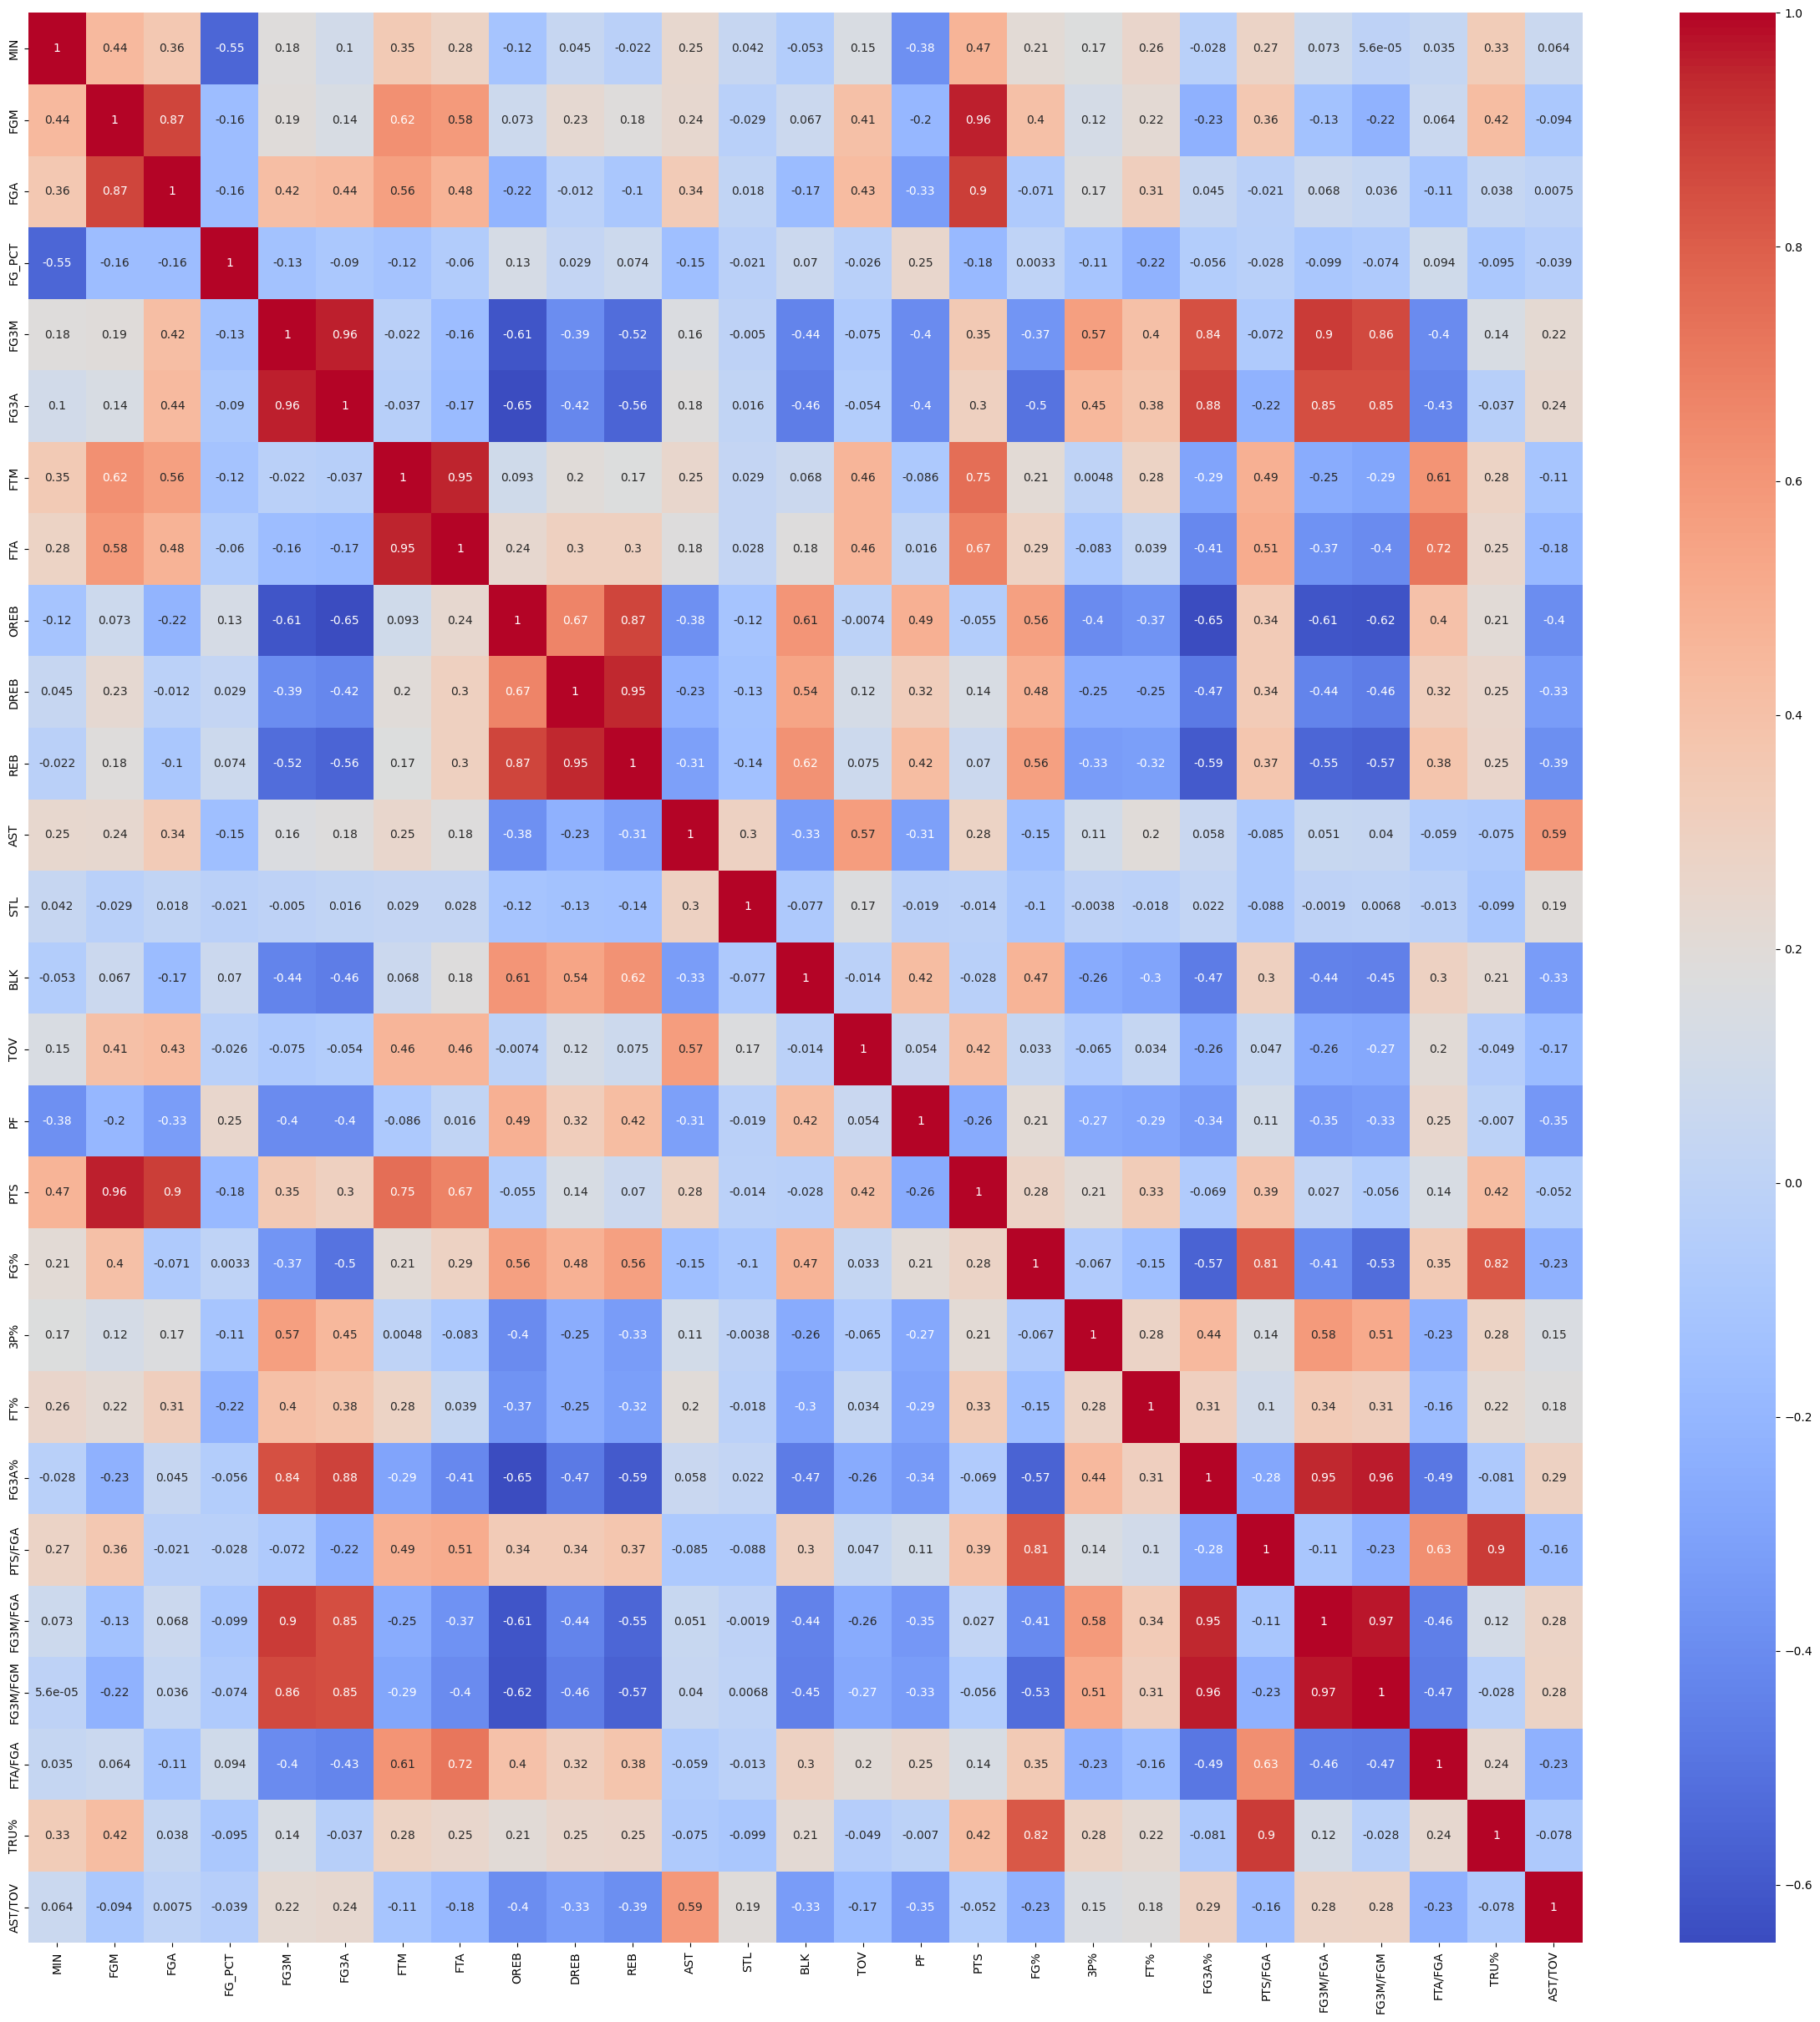

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
#The hien moi tuong quan giua cac cot trong data_per_min_corr
plt.figure(figsize=(30, 30))
sns.heatmap(data_per_min_corr, annot=True, cmap='coolwarm')
plt.show()

HOW ARE MINUTES PLAYED DISTRIBUTED?

In [17]:
import plotly.express as px

In [18]:
fig = px.histogram(x=data_regular_season['MIN'], histnorm='percent')
fig

In [19]:
import plotly.graph_objects as go

In [20]:
def hist_data(df=data_regular_season, min_MIN=0, min_GP=0):
    return df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'PTS']/\
    df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'GP']

In [21]:
#VE BIEU DO HISTOGRAM DUA TREN DU LIEU TU HIST_DATA
fig = go.Figure()
fig.add_trace(go.Histogram(x=hist_data(data_regular_season,50,5), histnorm='percent',\
                            name='Regular Season', xbins={'start': 0, 'end': 38, 'size': 1}))
fig.add_trace(go.Histogram(x=hist_data(data_playoff,5,1), histnorm='percent',\
                            name='Playoff', xbins={'start': 0, 'end': 38, 'size': 1}))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)

fig.show()

In [22]:
((hist_data(data_regular_season,50,5)>=12)&(hist_data(data_regular_season,50,5)<=34)).mean()

0.2567284166375393

HOW HAS THE GAME CHANGE OVER THE PAST 10 YEARS

In [ ]:
#Group by theo mua giai va tinh tong cac cot trong total_columns
change_df = data.groupby('season_start_year')[total_columns].sum().reset_index()
change_df

,season_start_year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2012,635884,97235,215105,287.220,18808,52569,44125,58618,29237,81362,110599,57694,20376,13444,36542,52548,257403
1,2013,638373,99251,218411,290.869,20480,56952,47219,62420,28669,83812,112481,57657,20156,12369,36826,54839,266201
2,2014,634546,98251,219265,295.814,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324
3,2015,636391,100351,222344,303.308,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742
4,2016,632482,102147,223333,307.263,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508
5,2017,633425,103729,225523,329.784,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709
6,2018,634231,107374,233717,320.057,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236
7,2019,552262,92997,202223,323.376,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975
8,2020,562518,95849,205754,338.803,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871
9,2021,635572,106569,231293,356.257,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611


In [ ]:
#Tinh toan cot POSS_est theo cong thuc FGA - OREB + TOV + 0.44*FTA
change_df['POSS_est'] = change_df['FGA'] - change_df['OREB'] + change_df['TOV'] + 0.44*change_df['FTA']
change_df

,season_start_year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_est
0,2012,635884,97235,215105,287.220,18808,52569,44125,58618,29237,81362,110599,57694,20376,13444,36542,52548,257403,248201.92
1,2013,638373,99251,218411,290.869,20480,56952,47219,62420,28669,83812,112481,57657,20156,12369,36826,54839,266201,254032.80
2,2014,634546,98251,219265,295.814,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324,253004.12
3,2015,636391,100351,222344,303.308,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742,258064.80
4,2016,632482,102147,223333,307.263,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508,258443.80
5,2017,633425,103729,225523,329.784,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709,260904.52
6,2018,634231,107374,233717,320.057,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236,268739.84
7,2019,552262,92997,202223,323.376,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975,234384.64
8,2020,562518,95849,205754,338.803,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871,235759.48
9,2021,635572,106569,231293,356.257,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611,264004.96


In [ ]:
#Chuyen cot POSS_est ve vi tri thu 2
change_df = change_df[list(change_df.columns[0:2])+['POSS_est']+list(change_df.columns[2:-1])]
change_df

,season_start_year,MIN,POSS_est,FGM,FGA,FG_PCT,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2012,635884,248201.92,97235,215105,287.220,18808,52569,44125,58618,29237,81362,110599,57694,20376,13444,36542,52548,257403
1,2013,638373,254032.80,99251,218411,290.869,20480,56952,47219,62420,28669,83812,112481,57657,20156,12369,36826,54839,266201
2,2014,634546,253004.12,98251,219265,295.814,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324
3,2015,636391,258064.80,100351,222344,303.308,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742
4,2016,632482,258443.80,102147,223333,307.263,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508
5,2017,633425,260904.52,103729,225523,329.784,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709
6,2018,634231,268739.84,107374,233717,320.057,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236
7,2019,552262,234384.64,92997,202223,323.376,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975
8,2020,562518,235759.48,95849,205754,338.803,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871
9,2021,635572,264004.96,106569,231293,356.257,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611


In [29]:
#Tinh toan them cac chi so
change_df = change_df.copy()
change_df['FG%'] = change_df['FGM'] / change_df['FGA']
change_df['3P%'] = change_df['FG3M'] / change_df['FG3A']
change_df['FT%'] = change_df['FTM'] / change_df['FTA']
change_df['FG3A%'] = change_df['FG3A'] / change_df['FGA']
change_df['AST%'] = change_df['AST'] / change_df['FGM']
change_df['PTS/FGA'] = change_df['PTS'] / change_df['FGA']
change_df['FG3M/FGA'] = change_df['FG3M'] / change_df['FGA']
change_df['FTA/FGA'] = change_df['FTA'] / change_df['FGA']
change_df['TRU%'] = 0.5*change_df['PTS'] / (change_df['FGA'] + 0.475*change_df['FTA'])
change_df['AST/TOV'] = change_df['AST'] / change_df['TOV']


In [46]:
change_per48_df =  change_df.copy()

for col in change_per48_df.columns[2:18]:
    change_per48_df[col] = (change_per48_df[col] / change_per48_df['MIN']) * 48 * 5

change_per48_df = change_per48_df.drop(columns='MIN')

fig = go.Figure()
for col in change_per48_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per48_df['season_start_year'], y=change_per48_df[col], name=col))

fig.show()

In [47]:
import plotly.graph_objects as go

# Tạo Figure rỗng
fig = go.Figure()

# Lưu danh sách các nút chọn (buttons)
buttons = []

# Lặp qua từng cột và thêm dữ liệu vào menu chọn
for col in change_per48_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per48_df['season_start_year'], 
                             y=change_per48_df[col], 
                             name=col, 
                             visible=False))  # Ẩn mặc định

# Tạo các nút chọn để hiển thị từng chỉ số riêng
for i, col in enumerate(change_per48_df.columns[1:]):
    buttons.append(dict(label=col,
                        method="update",
                        args=[{"visible": [j == i for j in range(len(change_per48_df.columns[1:]))]},  # Chỉ hiển thị 1 trace
                              {"title": f"Biểu đồ {col}"}]))  

# Hiển thị biểu đồ đầu tiên mặc định
fig.data[0].visible = True  

# Thêm dropdown vào layout
fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, direction="down", showactive=True)],
    title="Biểu đồ với nút chọn",
    xaxis_title="Năm",
    yaxis_title="Giá trị"
)

# Hiển thị
fig.show()


In [52]:
change_per100_df =  change_df.copy()

for col in change_per100_df.columns[2:18]:
    change_per100_df[col] = (change_per100_df[col] / change_per100_df['POSS_est']) * 100

change_per100_df.drop(columns=['MIN', 'POSS_est'], inplace=True)
change_per100_df
fig = go.Figure()
for col in change_per100_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per100_df['season_start_year'], y=change_per100_df[col], name=col))

fig.show()

In [53]:
import plotly.graph_objects as go

# Tạo Figure rỗng
fig = go.Figure()

# Lưu danh sách các nút chọn (buttons)
buttons = []

# Lặp qua từng cột và thêm dữ liệu vào menu chọn
for col in change_per100_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per100_df['season_start_year'], 
                             y=change_per100_df[col], 
                             name=col, 
                             visible=False))  # Ẩn mặc định

# Tạo các nút chọn để hiển thị từng chỉ số riêng
for i, col in enumerate(change_per100_df.columns[1:]):
    buttons.append(dict(label=col,
                        method="update",
                        args=[{"visible": [j == i for j in range(len(change_per100_df.columns[1:]))]},  # Chỉ hiển thị 1 trace
                              {"title": f"Biểu đồ {col}"}]))  

# Hiển thị biểu đồ đầu tiên mặc định
fig.data[0].visible = True  

# Thêm dropdown vào layout
fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, direction="down", showactive=True)],
    title="Biểu đồ với nút chọn",
    xaxis_title="Năm",
    yaxis_title="Giá trị"
)

# Hiển thị
fig.show()


COMPARE REGULAR SEASON TO PLAYOFFS

In [54]:
rs_change_df = data_regular_season.groupby('season_start_year')[total_columns].sum().reset_index()
rs_change_df

,season_start_year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2012,594486,91282,201609,202.673,17603,49067,41056,54533,27456,76118,103574,54415,19178,12622,34294,48775,241223
1,2013,595202,92779,204172,209.653,19054,52974,43870,58029,26846,78315,105161,54131,18895,11594,34566,50923,248482
2,2014,595214,92287,205570,212.186,19300,55137,42161,56198,26781,79723,106504,54202,19031,11797,33725,49728,246035
3,2015,594864,94065,208049,210.944,20953,59241,43489,57469,25624,82021,107645,54831,19303,12193,33936,49854,252572
4,2016,594409,96061,210114,214.021,23748,66421,43883,56855,24936,82109,107045,55660,18950,11669,32897,48950,259753
5,2017,593865,97435,211707,238.026,25807,71339,40903,53325,23890,83159,107049,57163,18983,11845,33638,48837,261580
6,2018,594465,101062,219458,233.153,27955,78742,43494,56758,25454,85653,111107,60483,18779,12185,33293,51425,273573
7,2019,512068,86550,188116,235.437,25862,72252,37826,48943,21340,73617,94957,51649,16200,10378,29470,44004,236788
8,2020,521512,89020,190983,241.312,27427,74822,36650,47135,21232,74454,95686,53577,16356,10524,28568,41669,242117
9,2021,593758,99930,216722,261.316,30598,86535,41657,53781,25422,83925,109347,60636,18772,11594,32117,48306,272115


In [55]:
po_change_df = data_playoff.groupby('season_start_year')[total_columns].sum().reset_index()
po_change_df

,season_start_year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2012,41398,5953,13496,84.547,1205,3502,3069,4085,1781,5244,7025,3279,1198,822,2248,3773,16180
1,2013,43171,6472,14239,81.216,1426,3978,3349,4391,1823,5497,7320,3526,1261,775,2260,3916,17719
2,2014,39332,5964,13695,83.628,1424,4139,2937,4050,1785,5508,7293,3525,1230,868,2071,3544,16289
3,2015,41527,6286,14295,92.364,1571,4432,3027,4051,1802,5590,7392,3420,1259,853,2142,3624,17170
4,2016,38073,6086,13219,93.242,1660,4597,2923,3765,1534,5064,6598,3502,1193,740,2011,3282,16755
5,2017,39560,6294,13816,91.758,1723,4906,2818,3683,1507,5519,7026,3576,1198,791,2057,3401,17129
6,2018,39766,6312,14259,86.904,1862,5401,3177,4053,1674,5707,7381,3774,1161,799,2101,3638,17663
7,2019,40194,6447,14107,87.939,2170,6027,3123,3963,1462,5701,7163,3796,1168,707,2215,3611,18187
8,2020,41006,6829,14771,97.491,2122,5831,2974,3782,1686,5697,7383,3734,1135,748,1952,3483,18754
9,2021,41814,6639,14571,94.941,2135,6017,3083,3928,1630,5677,7307,3982,1234,793,2255,3732,18496
